# Prepaid Clustering Notebook

## Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
os.getcwd()

'C:\\Users\\karling.khoo\\Documents\\Python Scripts'

In [4]:
prepaid_data_path = os.getcwd()+r'\\VALIB_PREPAID_PERSONALIZATION_202404.csv'

df = pd.read_csv(prepaid_data_path)
df.head()

C:\Users\karling.khoo\AppData\Local\Temp\ipykernel_16288\4165472213.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(prepaid_data_path)


,subs_id,msisdn,flag_churn,rateplan,tenure,region,state,dealer_channel,count_pack,total_active_duration,...,daily_1gb_usage_gb_prev2,daily_5gb_usage_gb_prev2,daily_micro_usage_gb_prev2,weekly_10gb_usage_gb_prev2,weekly_micro_usage_gb_prev2,highest_reload_channel_prev2,avg_reload_prev2,sum_reload_prev2,reload_txn_prev2,duration_topup_addon_prev2
0,4756,60182003598,N,5G-Ready Prepaid,6,Central,Selangor,Branch,1,88,...,NaN,NaN,NaN,NaN,NaN,MyUMobile App,30.000,60.00,2.0,1.0
1,43569,60185753268,N,U Prepaid Plan,189,Northern,Perak,Mass,1,89,...,NaN,NaN,NaN,NaN,NaN,eRecharge,50.000,50.00,1.0,32.0
2,43912,60185758790,N,U Prepaid Plan,189,Northern,Perak,Mass,1,89,...,NaN,NaN,NaN,NaN,NaN,MyUMobile App,40.000,40.00,1.0,29.0
3,46922,60187746263,N,Unlimited Power,188,Southern,Johor,Mass,2,83,...,NaN,NaN,NaN,NaN,NaN,eRecharge,18.865,37.73,2.0,38.0
4,52389,60185755162,N,Power Prepaid,186,Northern,Perak,Mass,1,61,...,NaN,NaN,NaN,NaN,NaN,eRecharge,38.000,38.00,1.0,33.0


### SUM USAGE COLUMN 

In [5]:
df_sum = df.copy()

# Summing the columns
df_sum['total_voice_usage_curr'] = df['voice_usage_free_min_daily_curr'] + df['voice_usage_paid_min_daily_curr']
df_sum['total_voice_usage_prev'] = df['voice_usage_free_min_daily_prev'] + df['voice_usage_paid_min_daily_prev']
df_sum['total_voice_usage_prev2'] = df['voice_usage_free_min_daily_prev2'] + df['voice_usage_paid_min_daily_prev2']
df_sum['total_data_usage_curr'] = df['data4g_gb_mthly_curr'] + df['data5g_gb_mthly_curr']
df_sum['total_data_usage_prev'] = df['data4g_gb_mthly_prev'] + df['data5g_gb_mthly_prev']
df_sum['total_data_usage_prev2'] = df['data4g_gb_mthly_prev2'] + df['data5g_gb_mthly_prev2']

# Print the resulting DataFrame
df_sum.head()


,subs_id,msisdn,flag_churn,rateplan,tenure,region,state,dealer_channel,count_pack,total_active_duration,...,avg_reload_prev2,sum_reload_prev2,reload_txn_prev2,duration_topup_addon_prev2,total_voice_usage_curr,total_voice_usage_prev,total_voice_usage_prev2,total_data_usage_curr,total_data_usage_prev,total_data_usage_prev2
0,4756,60182003598,N,5G-Ready Prepaid,6,Central,Selangor,Branch,1,88,...,30.000,60.00,2.0,1.0,11.973333,0.366667,0.275000,0.684605,0.011401,0.452921
1,43569,60185753268,N,U Prepaid Plan,189,Northern,Perak,Mass,1,89,...,50.000,50.00,1.0,32.0,1.374306,6.567816,8.838506,14.948018,21.386023,16.925427
2,43912,60185758790,N,U Prepaid Plan,189,Northern,Perak,Mass,1,89,...,40.000,40.00,1.0,29.0,1.062821,1.170290,1.820690,70.632423,69.221106,48.195300
3,46922,60187746263,N,Unlimited Power,188,Southern,Johor,Mass,2,83,...,18.865,37.73,2.0,38.0,2.933333,3.160870,2.589583,8.501127,4.969685,5.377973
4,52389,60185755162,N,Power Prepaid,186,Northern,Perak,Mass,1,61,...,38.000,38.00,1.0,33.0,1.788889,2.662179,2.838690,2.610334,10.541577,5.948329


## Data Cleaning

### First layer: Align Drop Columns (Usage)

In [6]:
# Drop Columns aligned with Prepaid Team
drop_col = ['data4g_gb_mthly_curr',
'data4g_gb_mthly_prev',
'data4g_gb_mthly_prev2',
'data5g_gb_mthly_curr',
'data5g_gb_mthly_prev',
'data5g_gb_mthly_prev2',
'voice_usage_free_min_mthly_curr',
'voice_usage_free_min_mthly_prev',
'voice_usage_free_min_mthly_prev2',
'voice_usage_paid_min_mthly_curr',
'voice_usage_paid_min_mthly_prev',
'voice_usage_paid_min_mthly_prev2',
'macro_rev_curr',
'macro_rev_prev',
'macro_rev_prev2',
'micro_rev_curr',
'micro_rev_prev',
'micro_rev_prev2',
'total_rev_curr',
'total_rev_prev',
'total_rev_prev2',
'curr_plan_netrev',
'prev_plan_rev',
'prev2_plan_rev',
'curr_pk_dur',
'tenure',
'duration_topup_addon_curr',
'duration_topup_addon_prev',
'duration_topup_addon_prev2',
'prev_pk_dur',
'prev2_pk_dur',
'total_active_duration',
'addon_type_curr',
'addon_type_prev',
'addon_type_prev2',
'curr_plan_rev',
'curr_pack',
'5g_ready',
'avg_reload_curr',
'avg_reload_prev',
'avg_reload_prev2',
'bos_rev_curr',
'bos_rev_prev',
'bos_rev_prev2',
'cnt_5Gredemp_curr',
'cnt_5Gredemp_prev',
'cnt_5Gredemp_prev2',
'count_pack',
'daily_1gb_usage_gb_curr',
'daily_1gb_usage_gb_prev',
'daily_1gb_usage_gb_prev2',
'daily_5gb_usage_gb_curr',
'daily_5gb_usage_gb_prev',
'daily_5gb_usage_gb_prev2',
'daily_micro_usage_gb_curr',
'daily_micro_usage_gb_prev',
'daily_micro_usage_gb_prev2',
'data4g_gb_daily_curr',
'data4g_gb_daily_prev',
'data4g_gb_daily_prev2',
'data5g_gb_daily_curr',
'data5g_gb_daily_prev',
'data5g_gb_daily_prev2',
'day_1gb_txn_curr',
'day_1gb_txn_prev',
'day_1gb_txn_prev2',
'day_5gb_txn_curr',
'day_5gb_txn_prev',
'day_5gb_txn_prev2',
'day_micro_rev_curr',
'day_micro_rev_prev',
'day_micro_rev_prev2',
'day_micro_txn_curr',
'day_micro_txn_prev',
'day_micro_txn_prev2',
'dcb_netrev_curr',
'dcb_netrev_prev',
'dcb_netrev_prev2',
'dealer_channel',
'device',
'device_brand',
'flag_app_p90d',
'flag_churn',
'highest_reload_channel_curr',
'highest_reload_channel_prev',
'highest_reload_channel_prev2',
'hotspot_rev_curr',
'hotspot_rev_prev',
'hotspot_rev_prev2',
'idd_rev_curr',
'idd_rev_prev',
'idd_rev_prev2',
'macro_movement',
'msisdn',
'oth_rev_curr',
'oth_rev_prev',
'oth_rev_prev2',
'prev_pack',
'prev2_pack',
'prev3_pack',
'prev3_pk_dur',
'prev3_plan_rev',
'rateplan',
'region',
'reload_txn_curr',
'reload_txn_prev',
'reload_txn_prev2',
'roam_rev_curr',
'roam_rev_prev',
'roam_rev_prev2',
'sms_rev_curr',
'sms_rev_prev',
'sms_rev_prev2',
'sms_txn_curr',
'sms_txn_prev',
'sms_txn_prev2',
'smsc_rev_curr',
'smsc_rev_prev',
'smsc_rev_prev2',
'state',
'subs_id',
'sum_reload_curr',
'sum_reload_prev',
'sum_reload_prev2',
'voice_rev_curr',
'voice_rev_prev',
'voice_rev_prev2',
'voice_usage_free_min_daily_curr',
'voice_usage_free_min_daily_prev',
'voice_usage_free_min_daily_prev2',
'voice_usage_paid_min_daily_curr',
'voice_usage_paid_min_daily_prev',
'voice_usage_paid_min_daily_prev2',
'VoLTE_enabled',
'VoWifi_enabled',
'week_10gb_txn_curr',
'week_10gb_txn_prev',
'week_10gb_txn_prev2',
'week_micro_rev_curr',
'week_micro_rev_prev',
'week_micro_rev_prev2',
'week_micro_txn_curr',
'week_micro_txn_prev',
'week_micro_txn_prev2',
'weekly_10gb_usage_gb_curr',
'weekly_10gb_usage_gb_prev',
'weekly_10gb_usage_gb_prev2',
'weekly_micro_usage_gb_curr',
'weekly_micro_usage_gb_prev',
'weekly_micro_usage_gb_prev2'
            ]
df_copy_drop = df_sum.drop(drop_col, axis = 1)

In [7]:
df_copy_drop.head()

,hotspot_txn_curr,speed_bos_txn_curr,hotspot_txn_prev,speed_bos_txn_prev,hotspot_txn_prev2,speed_bos_txn_prev2,total_voice_usage_curr,total_voice_usage_prev,total_voice_usage_prev2,total_data_usage_curr,total_data_usage_prev,total_data_usage_prev2
0,NaN,NaN,NaN,NaN,NaN,NaN,11.973333,0.366667,0.275000,0.684605,0.011401,0.452921
1,NaN,NaN,NaN,NaN,NaN,NaN,1.374306,6.567816,8.838506,14.948018,21.386023,16.925427
2,NaN,NaN,NaN,NaN,NaN,NaN,1.062821,1.170290,1.820690,70.632423,69.221106,48.195300
3,NaN,NaN,NaN,NaN,NaN,NaN,2.933333,3.160870,2.589583,8.501127,4.969685,5.377973
4,NaN,NaN,NaN,NaN,NaN,NaN,1.788889,2.662179,2.838690,2.610334,10.541577,5.948329


In [8]:
# Additionally, Drop all columns with more than 30% Missing Values

# Step 1: Calculate the percentage of missing values in each column
missing_percentages = df_copy_drop.isnull().mean() * 100

# Step 2: Identify columns with more than 30% missing values
columns_to_remove = missing_percentages[missing_percentages > 30].index

# Step 3: Remove columns with more than 30% missing values from the DataFrame
df_cleaned = df_copy_drop.drop(columns=columns_to_remove)

# Optionally, you can also print or inspect the removed columns
print("Columns removed due to more than 30% missing values:", len(columns_to_remove))
print(columns_to_remove)

Columns removed due to more than 30% missing values: 6
Index(['hotspot_txn_curr', 'speed_bos_txn_curr', 'hotspot_txn_prev',
       'speed_bos_txn_prev', 'hotspot_txn_prev2', 'speed_bos_txn_prev2'],
      dtype='object')


In [9]:
#Output drop column with >30% missing values
pd.DataFrame(missing_percentages, columns = ['missing_percentage']).reset_index().to_excel(".\\MYOUTPUT1.xlsx")

## Further Data Preparation for Clustering

In [10]:
df_copy_drop.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673227 entries, 0 to 2673226
Empty DataFrame


### Fill Na Values with 0

In [11]:
import pandas as pd

numeric_columns = df_copy_drop.select_dtypes(exclude='object').columns

for col in numeric_columns:
    df_copy_drop[col] = df_copy_drop[col].fillna(0)

In [12]:
df_copy_drop.head()

,hotspot_txn_curr,speed_bos_txn_curr,hotspot_txn_prev,speed_bos_txn_prev,hotspot_txn_prev2,speed_bos_txn_prev2,total_voice_usage_curr,total_voice_usage_prev,total_voice_usage_prev2,total_data_usage_curr,total_data_usage_prev,total_data_usage_prev2
0,0.0,0.0,0.0,0.0,0.0,0.0,11.973333,0.366667,0.275000,0.684605,0.011401,0.452921
1,0.0,0.0,0.0,0.0,0.0,0.0,1.374306,6.567816,8.838506,14.948018,21.386023,16.925427
2,0.0,0.0,0.0,0.0,0.0,0.0,1.062821,1.170290,1.820690,70.632423,69.221106,48.195300
3,0.0,0.0,0.0,0.0,0.0,0.0,2.933333,3.160870,2.589583,8.501127,4.969685,5.377973
4,0.0,0.0,0.0,0.0,0.0,0.0,1.788889,2.662179,2.838690,2.610334,10.541577,5.948329


## LabelEncoding Method

In [94]:
# Select categorical columns
categorical_columns = df_copy_drop.select_dtypes(include='object').columns

# Use LabelEncoder to encode categorical variables
label_encoder = LabelEncoder()

for col in categorical_columns:
    df_cleaned[col+"_enc"] = label_encoder.fit_transform(df_copy_drop[col])

df_encoded = df_copy_drop.drop(categorical_columns, axis = 1)

In [96]:
df_encoded.head()

,hotspot_txn_curr,speed_bos_txn_curr,hotspot_txn_prev,speed_bos_txn_prev,hotspot_txn_prev2,speed_bos_txn_prev2,total_voice_usage_curr,total_voice_usage_prev,total_voice_usage_prev2,total_data_usage_curr,total_data_usage_prev,total_data_usage_prev2
0,0.0,0.0,0.0,0.0,0.0,0.0,11.973333,0.366667,0.275000,0.684605,0.011401,0.452921
1,0.0,0.0,0.0,0.0,0.0,0.0,1.374306,6.567816,8.838506,14.948018,21.386023,16.925427
2,0.0,0.0,0.0,0.0,0.0,0.0,1.062821,1.170290,1.820690,70.632423,69.221106,48.195300
3,0.0,0.0,0.0,0.0,0.0,0.0,2.933333,3.160870,2.589583,8.501127,4.969685,5.377973
4,0.0,0.0,0.0,0.0,0.0,0.0,1.788889,2.662179,2.838690,2.610334,10.541577,5.948329


### Scale Features

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
array_scaled = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(array_scaled, columns = df_encoded.columns)


In [17]:
pd.set_option('display.max_columns', None)
df_scaled.describe()

,hotspot_txn_curr,speed_bos_txn_curr,hotspot_txn_prev,speed_bos_txn_prev,hotspot_txn_prev2,speed_bos_txn_prev2,total_voice_usage_curr,total_voice_usage_prev,total_voice_usage_prev2,total_data_usage_curr,total_data_usage_prev,total_data_usage_prev2
count,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06
mean,1.546954e-18,-1.292849e-17,-8.728860e-18,7.867669e-18,1.601177e-17,2.226338e-17,3.918152e-17,6.103557e-17,-1.008284e-16,9.963977e-16,-6.528039e-17,5.402324e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.898158e-01,-9.357867e-02,-1.838273e-01,-8.180660e-02,-1.931401e-01,-8.123799e-02,-2.286344e-01,-2.273758e-01,-2.345570e-01,-1.195355e+00,-1.126776e+00,-1.123345e+00
25%,-1.898158e-01,-9.357867e-02,-1.838273e-01,-8.180660e-02,-1.931401e-01,-8.123799e-02,-2.201261e-01,-2.191140e-01,-2.246454e-01,-6.697391e-01,-6.794172e-01,-6.710939e-01
50%,-1.898158e-01,-9.357867e-02,-1.838273e-01,-8.180660e-02,-1.931401e-01,-8.123799e-02,-1.823609e-01,-1.820419e-01,-1.846120e-01,-1.816228e-01,-1.846612e-01,-1.846621e-01
75%,-1.898158e-01,-9.357867e-02,-1.838273e-01,-8.180660e-02,-1.931401e-01,-8.123799e-02,-8.085776e-02,-8.493645e-02,-8.253832e-02,4.141873e-01,4.148259e-01,4.071954e-01
max,1.021928e+02,1.838766e+02,1.454009e+02,2.678311e+02,1.419067e+02,2.680304e+02,9.361197e+01,9.700557e+01,1.041957e+02,6.591634e+01,4.020150e+01,5.973292e+01


In [18]:
df_scaled

,hotspot_txn_curr,speed_bos_txn_curr,hotspot_txn_prev,speed_bos_txn_prev,hotspot_txn_prev2,speed_bos_txn_prev2,total_voice_usage_curr,total_voice_usage_prev,total_voice_usage_prev2,total_data_usage_curr,total_data_usage_prev,total_data_usage_prev2
0,-0.189816,-0.093579,-0.183827,-0.081807,-0.19314,-0.081238,0.736482,-0.197083,-0.211559,-1.180138,-1.126546,-1.113523
1,-0.189816,-0.093579,-0.183827,-0.081807,-0.19314,-0.081238,-0.117858,0.315243,0.504597,-0.863112,-0.696620,-0.756311
2,-0.189816,-0.093579,-0.183827,-0.081807,-0.19314,-0.081238,-0.142965,-0.130689,-0.082295,0.374558,0.265527,-0.078213
3,-0.189816,-0.093579,-0.183827,-0.081807,-0.19314,-0.081238,0.007808,0.033769,-0.017993,-1.006404,-1.026816,-1.006722
4,-0.189816,-0.093579,-0.183827,-0.081807,-0.19314,-0.081238,-0.084440,-0.007432,0.002839,-1.137336,-0.914744,-0.994353
...,...,...,...,...,...,...,...,...,...,...,...,...
2673222,-0.189816,-0.093579,-0.183827,-0.081807,-0.19314,-0.081238,-0.203109,-0.227376,-0.234557,0.537155,0.381737,0.063823
2673223,-0.189816,-0.093579,-0.183827,-0.081807,-0.19314,-0.081238,-0.228634,-0.227376,-0.234557,-1.126963,-0.900481,-0.967228
2673224,-0.189816,-0.093579,-0.183827,-0.081807,-0.19314,-0.081238,9.611277,-0.227376,-0.234557,0.746246,0.932486,1.561127
2673225,-0.189816,-0.093579,-0.183827,-0.081807,-0.19314,-0.081238,0.885064,-0.227376,-0.234557,-0.844138,-0.787758,-0.903520


### Begin Clustering


#### Hyperparameter Tuning


None
None
None
None
None
None
None
None
None
Cluster 10 Done 0 days 00:00:37.898034


<function matplotlib.pyplot.show(close=None, block=None)>

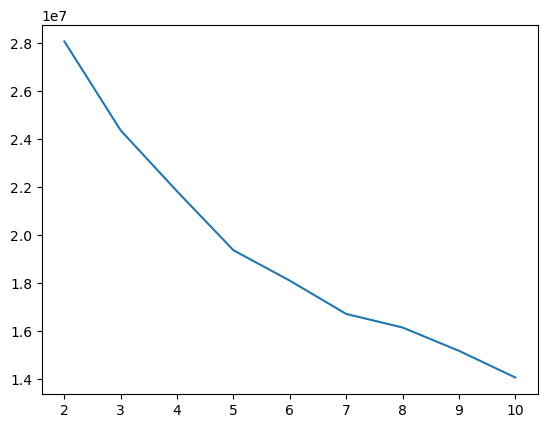

In [171]:
wcss_vec = []
silscore_vec = []
current_timestamp = pd.Timestamp.now()

for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init = 'auto')
    cluster_labels = kmeans.fit_predict(df_scaled)
    print(wcss_vec.append(kmeans.inertia_))
# silscore = silhouette_score(df_scaled_dropcorr, cluster_labels)
# silscore_vec.append(silscore)
print("Cluster", i, "Done", pd.Timestamp.now() - current_timestamp)  
plt.plot(range(2,11), wcss_vec)
plt.show

#### Fit Model

In [153]:
# Run a Test Cluster
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42, n_init = 'auto')
cluster_labels = kmeans.fit_predict(df_scaled)

In [160]:
kmeans = kmeans.inertia_
print(kmeans)

14049228.176744


In [23]:

pd.DataFrame(np.unique(cluster_labels, return_counts = True)).transpose()

,0,1
0,0,13195
1,1,632860
2,2,2023758
3,3,3414


In [24]:

# Extract centroid coordinates from the k-means model
centroid_table = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns)

centroid_table

,hotspot_txn_curr,speed_bos_txn_curr,hotspot_txn_prev,speed_bos_txn_prev,hotspot_txn_prev2,speed_bos_txn_prev2,total_voice_usage_curr,total_voice_usage_prev,total_voice_usage_prev2,total_data_usage_curr,total_data_usage_prev,total_data_usage_prev2
0,0.059052,0.027120,0.054389,0.025681,0.041105,0.038884,9.464385,10.081561,9.560131,0.143569,0.189117,0.154177
1,0.265024,0.060561,0.283917,0.060079,0.280546,0.056650,-0.043235,-0.043514,-0.039537,1.207964,1.241553,1.196438
2,-0.085027,-0.045851,-0.090948,-0.046317,-0.089831,-0.044039,-0.048322,-0.052268,-0.050123,-0.381079,-0.391841,-0.377417
3,1.062000,15.853656,1.088949,16.224565,1.103170,15.458270,0.060224,0.064715,0.071891,1.492044,1.471114,1.416335


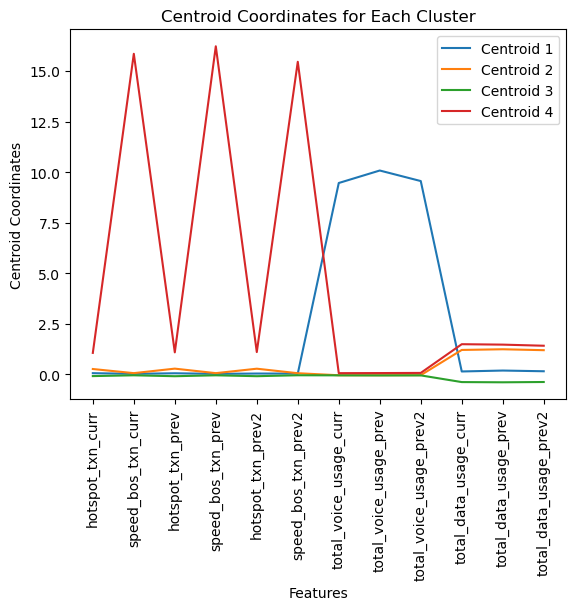

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming centroid_table is your DataFrame containing centroid coordinates
# and features are your feature names
features = centroid_table.columns

centroids_to_plot = range(len(centroid_table))
# centroids_to_plot = [0, 3]
# Plot each centroid coordinate as a line
for i in centroids_to_plot:
    plt.plot(features, centroid_table.iloc[i], label=f'Centroid {i+1}')

# Add labels and legend
plt.xlabel('Features')
plt.ylabel('Centroid Coordinates')
plt.title('Centroid Coordinates for Each Cluster')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()


## Chosen Model

In [26]:
# Run a Test Cluster
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42, n_init = 'auto')
cluster_labels = kmeans.fit_predict(df_scaled)
output_table = pd.concat([df_copy_drop, df['msisdn'],df['curr_pack'],df['macro_movement'], pd.DataFrame(cluster_labels, columns = ["cluster_labels"])], axis = 1)


In [27]:
output_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673227 entries, 0 to 2673226
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   hotspot_txn_curr         float64
 1   speed_bos_txn_curr       float64
 2   hotspot_txn_prev         float64
 3   speed_bos_txn_prev       float64
 4   hotspot_txn_prev2        float64
 5   speed_bos_txn_prev2      float64
 6   total_voice_usage_curr   float64
 7   total_voice_usage_prev   float64
 8   total_voice_usage_prev2  float64
 9   total_data_usage_curr    float64
 10  total_data_usage_prev    float64
 11  total_data_usage_prev2   float64
 12  msisdn                   int64  
 13  curr_pack                object 
 14  macro_movement           object 
 15  cluster_labels           int32  
dtypes: float64(12), int32(1), int64(1), object(2)
memory usage: 316.1+ MB


In [28]:

# Extract centroid coordinates from the k-means model
centroid_table = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns)

centroid_table

,hotspot_txn_curr,speed_bos_txn_curr,hotspot_txn_prev,speed_bos_txn_prev,hotspot_txn_prev2,speed_bos_txn_prev2,total_voice_usage_curr,total_voice_usage_prev,total_voice_usage_prev2,total_data_usage_curr,total_data_usage_prev,total_data_usage_prev2
0,0.059052,0.027120,0.054389,0.025681,0.041105,0.038884,9.464385,10.081561,9.560131,0.143569,0.189117,0.154177
1,0.265024,0.060561,0.283917,0.060079,0.280546,0.056650,-0.043235,-0.043514,-0.039537,1.207964,1.241553,1.196438
2,-0.085027,-0.045851,-0.090948,-0.046317,-0.089831,-0.044039,-0.048322,-0.052268,-0.050123,-0.381079,-0.391841,-0.377417
3,1.062000,15.853656,1.088949,16.224565,1.103170,15.458270,0.060224,0.064715,0.071891,1.492044,1.471114,1.416335


In [29]:
pd.DataFrame(np.unique(cluster_labels, return_counts = True)).transpose()

,0,1
0,0,13195
1,1,632860
2,2,2023758
3,3,3414


In [30]:
standardscaler = StandardScaler()
arr_centroids_scaled = standardscaler.fit_transform(centroid_table)
df_centroids_scaled = pd.DataFrame(arr_centroids_scaled, columns = centroid_table.columns)
df_centroids_scaled

,hotspot_txn_curr,speed_bos_txn_curr,hotspot_txn_prev,speed_bos_txn_prev,hotspot_txn_prev2,speed_bos_txn_prev2,total_voice_usage_curr,total_voice_usage_prev,total_voice_usage_prev2,total_data_usage_curr,total_data_usage_prev,total_data_usage_prev2
0,-0.600689,-0.575420,-0.613545,-0.575556,-0.631166,-0.574093,1.731954,1.731955,1.731936,-0.617815,-0.575608,-0.600876
1,-0.135925,-0.570545,-0.110033,-0.570656,-0.114744,-0.571436,-0.585310,-0.584906,-0.585426,0.775239,0.806313,0.812168
2,-0.925794,-0.586059,-0.932366,-0.585813,-0.913566,-0.586495,-0.586550,-0.586909,-0.587982,-1.304460,-1.338447,-1.321584
3,1.662408,1.732024,1.655944,1.732025,1.659476,1.732023,-0.560094,-0.560140,-0.558528,1.147036,1.107743,1.110292


In [31]:
df_centroids_scaled_t = df_centroids_scaled.transpose()
# df_centroids_scaled_t

In [32]:
df_centroids_scaled_t['max_abs_col'] = df_centroids_scaled_t.abs().idxmax(axis=1)
df_centroids_scaled_t.to_excel(".\\summary_cluster_feature.xlsx")
df_centroids_scaled_t

,0,1,2,3,max_abs_col
hotspot_txn_curr,-0.600689,-0.135925,-0.925794,1.662408,3
speed_bos_txn_curr,-0.575420,-0.570545,-0.586059,1.732024,3
hotspot_txn_prev,-0.613545,-0.110033,-0.932366,1.655944,3
speed_bos_txn_prev,-0.575556,-0.570656,-0.585813,1.732025,3
hotspot_txn_prev2,-0.631166,-0.114744,-0.913566,1.659476,3
speed_bos_txn_prev2,-0.574093,-0.571436,-0.586495,1.732023,3
total_voice_usage_curr,1.731954,-0.585310,-0.586550,-0.560094,0
total_voice_usage_prev,1.731955,-0.584906,-0.586909,-0.560140,0
total_voice_usage_prev2,1.731936,-0.585426,-0.587982,-0.558528,0
total_data_usage_curr,-0.617815,0.775239,-1.304460,1.147036,2


In [33]:
feature_means = output_table.select_dtypes(include = 'number').groupby(['cluster_labels']).mean().transpose()
feature_means_labled = feature_means.merge(df_centroids_scaled_t, how = 'inner', left_index = True, right_index = True)
feature_means_labled.to_excel(".//summary_cluster_features_val.xlsx")

In [34]:
feature_means_labled

,0_x,1_x,2_x,3_x,0_y,1_y,2_y,3_y,max_abs_col
hotspot_txn_curr,0.160364,0.293153,0.067552,0.806971,-0.600689,-0.135925,-0.925794,1.662408,3
speed_bos_txn_curr,0.042668,0.054450,0.016863,5.634446,-0.575420,-0.570545,-0.586059,1.732024,3
hotspot_txn_prev,0.160288,0.314809,0.062519,0.856766,-0.613545,-0.110033,-0.932366,1.655944,3
speed_bos_txn_prev,0.036529,0.048183,0.012055,5.538664,-0.575556,-0.570656,-0.585813,1.732025,3
hotspot_txn_prev2,0.159909,0.323288,0.070519,0.884886,-0.631166,-0.114744,-0.913566,1.659476,3
speed_bos_txn_prev2,0.042137,0.048336,0.013042,5.448155,-0.574093,-0.571436,-0.586495,1.732023,3
total_voice_usage_curr,120.290739,2.300125,2.237117,3.583610,1.731954,-0.585310,-0.586550,-0.560094,0
total_voice_usage_prev,124.808467,2.225486,2.119695,3.535448,1.731955,-0.584906,-0.586909,-0.560140,0
total_voice_usage_prev2,117.147217,2.332048,2.205586,3.664386,1.731936,-0.585426,-0.587982,-0.558528,0
total_data_usage_curr,60.251753,108.119526,36.632513,120.909579,-0.617815,0.775239,-1.304460,1.147036,2


In [35]:
for i in np.unique(df_centroids_scaled_t['max_abs_col']):
    print_obj = df_centroids_scaled_t[df_centroids_scaled_t['max_abs_col']== i]
    print(print_obj)
    # df_centroids_scaled_t[df_centroids_scaled_t['max_abs_col']== i].to_csv(f".\\output{i}b.csv")
    output_table[cluster_labels == i].to_csv(f".\\data_cluster{i}.csv")


                                0         1         2         3  max_abs_col
total_voice_usage_curr   1.731954 -0.585310 -0.586550 -0.560094            0
total_voice_usage_prev   1.731955 -0.584906 -0.586909 -0.560140            0
total_voice_usage_prev2  1.731936 -0.585426 -0.587982 -0.558528            0
                               0         1         2         3  max_abs_col
total_data_usage_curr  -0.617815  0.775239 -1.304460  1.147036            2
total_data_usage_prev  -0.575608  0.806313 -1.338447  1.107743            2
total_data_usage_prev2 -0.600876  0.812168 -1.321584  1.110292            2
                            0         1         2         3  max_abs_col
hotspot_txn_curr    -0.600689 -0.135925 -0.925794  1.662408            3
speed_bos_txn_curr  -0.575420 -0.570545 -0.586059  1.732024            3
hotspot_txn_prev    -0.613545 -0.110033 -0.932366  1.655944            3
speed_bos_txn_prev  -0.575556 -0.570656 -0.585813  1.732025            3
hotspot_txn_prev2   -0.

### PIVOT

In [70]:
output_table[cluster_labels == i]

,hotspot_txn_curr,speed_bos_txn_curr,hotspot_txn_prev,speed_bos_txn_prev,hotspot_txn_prev2,speed_bos_txn_prev2,total_voice_usage_curr,total_voice_usage_prev,total_voice_usage_prev2,total_data_usage_curr,total_data_usage_prev,total_data_usage_prev2,msisdn,curr_pack,macro_movement,cluster_labels
2,0.0,0.0,0.0,0.0,0.0,0.0,1.062821,1.170290,1.820690,70.632423,69.221106,48.195300,60185758790,GX38,No Change,2
6,1.0,0.0,0.0,0.0,1.0,0.0,0.400000,0.126667,0.226667,76.639678,99.549104,80.450360,60187743384,GX30,No Change,1
9,0.0,0.0,0.0,0.0,0.0,0.0,2.764035,7.932407,1.465909,71.656831,79.949485,90.807444,60182120497,GX38,No Change,1
14,0.0,0.0,0.0,0.0,0.0,0.0,2.391667,0.000000,5.116667,84.653313,114.923989,81.185230,60182270474,GX43,Upgrader,1
20,0.0,0.0,0.0,0.0,0.0,0.0,0.283333,0.513333,0.520370,63.860552,63.451578,63.994748,60182059648,GX38,No Change,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673196,0.0,0.0,0.0,0.0,0.0,0.0,0.816667,0.000000,0.000000,104.939228,68.619201,93.678798,60189084480,U35,No Change,1
2673206,0.0,0.0,0.0,0.0,0.0,0.0,1.160000,0.000000,0.000000,105.911823,106.483060,114.348093,60182015407,U35,No Change,1
2673210,0.0,0.0,0.0,0.0,0.0,0.0,0.322222,0.000000,0.000000,83.984239,74.656137,61.937649,60189872300,U40,No Change,2
2673218,0.0,0.0,0.0,0.0,0.0,0.0,0.183333,0.000000,0.000000,57.961080,53.236232,56.437661,601111259437,U25,No Change,2


,0,1,2,3,max_abs_col
hotspot_txn_curr,-0.600689,-0.135925,-0.925794,1.662408,3
speed_bos_txn_curr,-0.575420,-0.570545,-0.586059,1.732024,3
hotspot_txn_prev,-0.613545,-0.110033,-0.932366,1.655944,3
speed_bos_txn_prev,-0.575556,-0.570656,-0.585813,1.732025,3
hotspot_txn_prev2,-0.631166,-0.114744,-0.913566,1.659476,3


In [36]:
output_table[cluster_labels == 1].groupby(['curr_pack', 'macro_movement']).size().unstack()

macro_movement,Downgrader,No Change,Substitute,Upgrader
curr_pack,,,,
GX30,21401.0,159123.0,318.0,223.0
GX38,14116.0,75747.0,28.0,13933.0
GX43,73.0,31577.0,NaN,30400.0
GameOnz 70,NaN,NaN,NaN,1.0
MB128,NaN,1.0,NaN,NaN
MB40,1.0,1.0,NaN,9.0
MB68,NaN,NaN,NaN,2.0
U Prepaid Borneo 20,6161.0,7798.0,NaN,NaN
U25,17479.0,13674.0,NaN,967.0


In [37]:

categorical_columns = output_table.select_dtypes(include='object').columns
# for i in np.unique(df_centroids_scaled_t['max_abs_col']):
# print("Cluster 1")
for i in np.unique(df_centroids_scaled_t['max_abs_col']):
    for j in categorical_columns:
        print('Cluster', i)
        out1 = output_table[cluster_labels == i][j].value_counts()
        print(out1)

Cluster 0
curr_pack
GX38                   5702
U35                    2473
GX43                   1521
U40                    1355
U25                    1028
U50                     487
U Prepaid Borneo 20     371
GX30                    246
UMI 30                    3
UMI 38                    2
UMI 36                    2
UMI 20                    2
UMI 50                    2
UMI 26                    1
Name: count, dtype: int64
Cluster 0
macro_movement
No Change     9010
Upgrader      2189
Downgrader    1993
Substitute       3
Name: count, dtype: int64
Cluster 2
curr_pack
GX30                   608715
GX38                   394750
U35                    349435
U25                    304920
U40                    140070
GX43                   128059
U Prepaid Borneo 20     40449
U50                     38696
UMI 30                   8526
UMI 20                   4526
UMI 36                   1862
UMI 50                   1591
UMI 26                   1536
UMI 38                   

In [39]:
cluster_data = pd.concat([df_centroids_scaled_t, pd.DataFrame(cluster_labels, columns = ["cluster_labels"])], axis = 1)
cluster_data0 = cluster_data[cluster_data.cluster_labels == 1]
output_table0 = output_table[output_table.cluster_labels == 1]

In [40]:
cluster_data0 = cluster_data0.drop("cluster_labels", axis = 1)
output_table0 = output_table0.drop("cluster_labels", axis = 1)

In [49]:
# df_sum.head()
#To be continue: COmbine second layer raw data and clustered data
df_centroids_scaled_t.head()
df_sum.head()

# Drop Columns aligned with Prepaid Team
drop_col2 = ['hotspot_txn_curr',
'hotspot_txn_prev',
'hotspot_txn_prev2',
'speed_bos_txn_curr',
'speed_bos_txn_prev',
'speed_bos_txn_prev2',
'data4g_gb_mthly_curr',
'data4g_gb_mthly_prev',
'data4g_gb_mthly_prev2',
'data5g_gb_mthly_curr',
'data5g_gb_mthly_prev',
'data5g_gb_mthly_prev2',
'voice_usage_free_min_mthly_curr',
'voice_usage_free_min_mthly_prev',
'voice_usage_free_min_mthly_prev2',
'voice_usage_paid_min_mthly_curr',
'voice_usage_paid_min_mthly_prev',
'voice_usage_paid_min_mthly_prev2',
'curr_pk_dur',
'tenure',
'duration_topup_addon_curr',
'duration_topup_addon_prev',
'duration_topup_addon_prev2',
'prev_pk_dur',
'prev2_pk_dur',
'total_active_duration',
'addon_type_curr',
'addon_type_prev',
'addon_type_prev2',
'curr_plan_rev',
'curr_pack',
'5g_ready',
'bos_rev_curr',
'bos_rev_prev',
'bos_rev_prev2',
'cnt_5Gredemp_curr',
'cnt_5Gredemp_prev',
'cnt_5Gredemp_prev2',
'count_pack',
'daily_1gb_usage_gb_curr',
'daily_1gb_usage_gb_prev',
'daily_1gb_usage_gb_prev2',
'daily_5gb_usage_gb_curr',
'daily_5gb_usage_gb_prev',
'daily_5gb_usage_gb_prev2',
'daily_micro_usage_gb_curr',
'daily_micro_usage_gb_prev',
'daily_micro_usage_gb_prev2',
'data4g_gb_daily_curr',
'data4g_gb_daily_prev',
'data4g_gb_daily_prev2',
'data5g_gb_daily_curr',
'data5g_gb_daily_prev',
'data5g_gb_daily_prev2',
'day_1gb_txn_curr',
'day_1gb_txn_prev',
'day_1gb_txn_prev2',
'day_5gb_txn_curr',
'day_5gb_txn_prev',
'day_5gb_txn_prev2',
'day_micro_rev_curr',
'day_micro_rev_prev',
'day_micro_rev_prev2',
'day_micro_txn_curr',
'day_micro_txn_prev',
'day_micro_txn_prev2',
'dcb_netrev_curr',
'dcb_netrev_prev',
'dcb_netrev_prev2',
'dealer_channel',
'device',
'device_brand',
'flag_app_p90d',
'flag_churn',
'highest_reload_channel_curr',
'highest_reload_channel_prev',
'highest_reload_channel_prev2',
'hotspot_rev_curr',
'hotspot_rev_prev',
'hotspot_rev_prev2',
'idd_rev_curr',
'idd_rev_prev',
'idd_rev_prev2',
'macro_movement',
'msisdn',
'oth_rev_curr',
'oth_rev_prev',
'oth_rev_prev2',
'prev_pack',
'prev2_pack',
'prev3_pack',
'prev3_pk_dur',
'prev3_plan_rev',
'rateplan',
'region',
'roam_rev_curr',
'roam_rev_prev',
'roam_rev_prev2',
'sms_rev_curr',
'sms_rev_prev',
'sms_rev_prev2',
'sms_txn_curr',
'sms_txn_prev',
'sms_txn_prev2',
'smsc_rev_curr',
'smsc_rev_prev',
'smsc_rev_prev2',
'state',
'subs_id',
'voice_rev_curr',
'voice_rev_prev',
'voice_rev_prev2',
'voice_usage_free_min_daily_curr',
'voice_usage_free_min_daily_prev',
'voice_usage_free_min_daily_prev2',
'voice_usage_paid_min_daily_curr',
'voice_usage_paid_min_daily_prev',
'voice_usage_paid_min_daily_prev2',
'VoLTE_enabled',
'VoWifi_enabled',
'week_10gb_txn_curr',
'week_10gb_txn_prev',
'week_10gb_txn_prev2',
'week_micro_rev_curr',
'week_micro_rev_prev',
'week_micro_rev_prev2',
'week_micro_txn_curr',
'week_micro_txn_prev',
'week_micro_txn_prev2',
'weekly_10gb_usage_gb_curr',
'weekly_10gb_usage_gb_prev',
'weekly_10gb_usage_gb_prev2',
'weekly_micro_usage_gb_curr',
'weekly_micro_usage_gb_prev',
'weekly_micro_usage_gb_prev2',
'total_voice_usage_curr',
'total_voice_usage_prev',
'total_voice_usage_prev2',
'total_data_usage_curr',
'total_data_usage_prev',
'total_data_usage_prev2'            
 ]
df_copy_drop2 = df_sum.drop(drop_col2, axis = 1)

In [51]:
df_copy_drop2

,curr_plan_netrev,prev_plan_rev,prev2_plan_rev,macro_rev_curr,micro_rev_curr,total_rev_curr,macro_rev_prev,micro_rev_prev,total_rev_prev,macro_rev_prev2,micro_rev_prev2,total_rev_prev2,avg_reload_curr,sum_reload_curr,reload_txn_curr,avg_reload_prev,sum_reload_prev,reload_txn_prev,avg_reload_prev2,sum_reload_prev2,reload_txn_prev2
0,25.0,NaN,NaN,25.0,NaN,NaN,25.0,NaN,NaN,25.0,NaN,NaN,10.00,10.00,1.0,30.00,30.00,1.0,30.000,60.00,2.0
1,38.0,NaN,NaN,38.0,NaN,NaN,38.0,NaN,NaN,38.0,NaN,NaN,50.00,50.00,1.0,50.00,50.00,1.0,50.000,50.00,1.0
2,38.0,NaN,NaN,38.0,NaN,39.00,38.0,NaN,39.06,38.0,NaN,NaN,20.00,40.00,2.0,20.00,40.00,2.0,40.000,40.00,1.0
3,40.0,38.0,NaN,40.0,NaN,41.35,38.0,NaN,40.55,38.0,NaN,38.89,18.87,37.74,2.0,47.17,47.17,1.0,18.865,37.73,2.0
4,38.0,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,38.00,38.00,1.0,NaN,NaN,0.0,38.000,38.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673222,40.0,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,30.00,1.0,NaN,NaN,0.0,NaN,NaN,0.0
2673223,35.0,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.00,35.00,1.0,NaN,NaN,0.0,NaN,NaN,0.0
2673224,35.0,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.00,35.00,1.0,NaN,NaN,0.0,NaN,NaN,0.0
2673225,35.0,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.00,35.00,1.0,NaN,NaN,0.0,NaN,NaN,0.0


In [83]:
# Clustered Data
output_table[cluster_labels == i]

#Dropped Raw Data
df_copy_drop2

#Combined both data.
df_layer2 = pd.concat([output_table[cluster_labels == i], df_copy_drop2], axis = 1)

In [86]:
df_layer2_base = df_layer2.drop(['msisdn','curr_pack','macro_movement'], axis = 1)

In [87]:
df_layer2_base.head()

,hotspot_txn_curr,speed_bos_txn_curr,hotspot_txn_prev,speed_bos_txn_prev,hotspot_txn_prev2,speed_bos_txn_prev2,total_voice_usage_curr,total_voice_usage_prev,total_voice_usage_prev2,total_data_usage_curr,total_data_usage_prev,total_data_usage_prev2,cluster_labels,curr_plan_netrev,prev_plan_rev,prev2_plan_rev,macro_rev_curr,micro_rev_curr,total_rev_curr,macro_rev_prev,micro_rev_prev,total_rev_prev,macro_rev_prev2,micro_rev_prev2,total_rev_prev2,avg_reload_curr,sum_reload_curr,reload_txn_curr,avg_reload_prev,sum_reload_prev,reload_txn_prev,avg_reload_prev2,sum_reload_prev2,reload_txn_prev2
2,0.0,0.0,0.0,0.0,0.0,0.0,1.062821,1.170290,1.820690,70.632423,69.221106,48.195300,2.0,38.0,NaN,NaN,38.0,NaN,39.0,38.0,NaN,39.06,38.0,NaN,NaN,20.0,40.0,2.0,20.0,40.0,2.0,40.0,40.0,1.0
6,1.0,0.0,0.0,0.0,1.0,0.0,0.400000,0.126667,0.226667,76.639678,99.549104,80.450360,1.0,30.0,NaN,NaN,30.0,NaN,NaN,30.0,NaN,NaN,30.0,NaN,NaN,17.5,35.0,2.0,17.5,35.0,2.0,17.5,35.0,2.0
9,0.0,0.0,0.0,0.0,0.0,0.0,2.764035,7.932407,1.465909,71.656831,79.949485,90.807444,1.0,38.0,NaN,NaN,38.0,NaN,NaN,38.0,NaN,NaN,38.0,NaN,NaN,40.0,40.0,1.0,40.0,40.0,1.0,20.0,40.0,2.0
14,0.0,0.0,0.0,0.0,0.0,0.0,2.391667,0.000000,5.116667,84.653313,114.923989,81.185230,1.0,35.0,30.0,NaN,43.0,NaN,NaN,43.0,NaN,NaN,35.0,NaN,NaN,50.0,50.0,1.0,50.0,50.0,1.0,17.5,35.0,2.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.283333,0.513333,0.520370,63.860552,63.451578,63.994748,2.0,38.0,NaN,NaN,38.0,NaN,NaN,38.0,NaN,NaN,38.0,NaN,NaN,35.0,35.0,1.0,20.0,40.0,2.0,35.0,35.0,1.0


# Further Filter K Means

### Fill Na Values with 0

In [88]:
#To be continue2

numeric_columns = df_layer2_base.select_dtypes(exclude='object').columns

for col in numeric_columns:
    df_layer2_base[col] = df_layer2_base[col].fillna(0)

In [97]:
# Select categorical columns
categorical_columns = df_layer2_base.select_dtypes(include='object').columns

# Use LabelEncoder to encode categorical variables
label_encoder_2 = LabelEncoder()

for col in categorical_columns:
    df_cleaned_2[col+"_enc"] = label_encoder.fit_transform(df_layer2_base[col])

df_encoded_2 = df_layer2_base.drop(categorical_columns, axis = 1)

In [ ]:
pd.set_option('display.max_columns', None)
df_scaled.describe()

In [98]:
df_encoded_2.head()

,hotspot_txn_curr,speed_bos_txn_curr,hotspot_txn_prev,speed_bos_txn_prev,hotspot_txn_prev2,speed_bos_txn_prev2,total_voice_usage_curr,total_voice_usage_prev,total_voice_usage_prev2,total_data_usage_curr,total_data_usage_prev,total_data_usage_prev2,cluster_labels,curr_plan_netrev,prev_plan_rev,prev2_plan_rev,macro_rev_curr,micro_rev_curr,total_rev_curr,macro_rev_prev,micro_rev_prev,total_rev_prev,macro_rev_prev2,micro_rev_prev2,total_rev_prev2,avg_reload_curr,sum_reload_curr,reload_txn_curr,avg_reload_prev,sum_reload_prev,reload_txn_prev,avg_reload_prev2,sum_reload_prev2,reload_txn_prev2
2,0.0,0.0,0.0,0.0,0.0,0.0,1.062821,1.170290,1.820690,70.632423,69.221106,48.195300,2.0,38.0,0.0,0.0,38.0,0.0,39.0,38.0,0.0,39.06,38.0,0.0,0.0,20.0,40.0,2.0,20.0,40.0,2.0,40.0,40.0,1.0
6,1.0,0.0,0.0,0.0,1.0,0.0,0.400000,0.126667,0.226667,76.639678,99.549104,80.450360,1.0,30.0,0.0,0.0,30.0,0.0,0.0,30.0,0.0,0.00,30.0,0.0,0.0,17.5,35.0,2.0,17.5,35.0,2.0,17.5,35.0,2.0
9,0.0,0.0,0.0,0.0,0.0,0.0,2.764035,7.932407,1.465909,71.656831,79.949485,90.807444,1.0,38.0,0.0,0.0,38.0,0.0,0.0,38.0,0.0,0.00,38.0,0.0,0.0,40.0,40.0,1.0,40.0,40.0,1.0,20.0,40.0,2.0
14,0.0,0.0,0.0,0.0,0.0,0.0,2.391667,0.000000,5.116667,84.653313,114.923989,81.185230,1.0,35.0,30.0,0.0,43.0,0.0,0.0,43.0,0.0,0.00,35.0,0.0,0.0,50.0,50.0,1.0,50.0,50.0,1.0,17.5,35.0,2.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.283333,0.513333,0.520370,63.860552,63.451578,63.994748,2.0,38.0,0.0,0.0,38.0,0.0,0.0,38.0,0.0,0.00,38.0,0.0,0.0,35.0,35.0,1.0,20.0,40.0,2.0,35.0,35.0,1.0


### Scare feature 2

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
array_scaled = scaler.fit_transform(df_encoded_2)
df_scaled_2 = pd.DataFrame(array_scaled, columns = df_encoded_2.columns)


In [172]:
pd.set_option('display.max_columns', None)
df_scaled_2.describe()

,hotspot_txn_curr,speed_bos_txn_curr,hotspot_txn_prev,speed_bos_txn_prev,hotspot_txn_prev2,speed_bos_txn_prev2,total_voice_usage_curr,total_voice_usage_prev,total_voice_usage_prev2,total_data_usage_curr,total_data_usage_prev,total_data_usage_prev2,cluster_labels,curr_plan_netrev,prev_plan_rev,prev2_plan_rev,macro_rev_curr,micro_rev_curr,total_rev_curr,macro_rev_prev,micro_rev_prev,total_rev_prev,macro_rev_prev2,micro_rev_prev2,total_rev_prev2,avg_reload_curr,sum_reload_curr,reload_txn_curr,avg_reload_prev,sum_reload_prev,reload_txn_prev,avg_reload_prev2,sum_reload_prev2,reload_txn_prev2
count,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06,2.673227e+06
mean,-3.756068e-16,-1.523244e-16,9.458214e-17,4.980022e-17,-1.777668e-17,-5.713629e-17,9.696370e-18,5.562655e-17,-9.955791e-17,7.299496e-16,4.007833e-16,1.154889e-15,-9.233666e-16,4.136267e-16,-1.080210e-17,7.112798e-17,-2.054950e-16,8.537484e-18,-1.373652e-16,-1.731738e-16,5.668974e-17,7.293542e-17,3.742459e-17,-2.753684e-17,-3.081149e-17,3.820710e-16,2.390070e-16,3.168332e-18,-3.898962e-16,2.328830e-16,-2.896153e-17,-1.010974e-15,3.676966e-16,-6.217585e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.673921e-01,-8.011507e-02,-1.695414e-01,-7.527259e-02,-1.757734e-01,-7.587726e-02,-2.681988e-01,-2.725637e-01,-2.733001e-01,-6.767306e-01,-6.796871e-01,-6.712180e-01,-6.748507e-01,-5.787231e+00,-6.252593e-01,-2.057944e-01,-3.583803e+00,-1.892603e-01,-3.178899e-01,-2.258000e+00,-2.031309e-01,-3.145265e+00,-2.301749e+00,-2.147396e-01,-4.145364e-01,-1.998301e+00,-1.021198e+00,-1.017916e+00,-1.731727e+00,-9.344510e-01,-9.353861e-01,-1.769523e+00,-9.092351e-01,-9.295083e-01
25%,-1.673921e-01,-8.011507e-02,-1.695414e-01,-7.527259e-02,-1.757734e-01,-7.587726e-02,-2.681988e-01,-2.725637e-01,-2.733001e-01,-6.767306e-01,-6.796871e-01,-6.712180e-01,-6.748507e-01,-4.710839e-01,-6.252593e-01,-2.057944e-01,-3.683585e-01,-1.892603e-01,-3.178899e-01,-1.454252e-02,-2.031309e-01,-2.980710e-01,-4.272021e-02,-2.147396e-01,-2.952866e-01,-6.355902e-01,-2.454034e-01,-4.589163e-01,-6.441397e-01,-1.681889e-01,-3.940790e-01,-6.686864e-01,-1.791567e-01,-4.056585e-01
50%,-1.673921e-01,-8.011507e-02,-1.695414e-01,-7.527259e-02,-1.757734e-01,-7.587726e-02,-2.681988e-01,-2.725637e-01,-2.733001e-01,-6.767306e-01,-6.796871e-01,-6.712180e-01,-6.748507e-01,2.883656e-01,-6.252593e-01,-2.057944e-01,1.675490e-01,-1.892603e-01,-3.178899e-01,-1.454252e-02,-2.031309e-01,-2.980710e-01,-4.272021e-02,-2.147396e-01,-2.952866e-01,2.053967e-01,-1.161042e-01,-4.589163e-01,-2.167729e-02,-4.047857e-02,-3.940790e-01,6.520486e-02,-5.747691e-02,-4.056585e-01
75%,-1.673921e-01,-8.011507e-02,-1.695414e-01,-7.527259e-02,-1.757734e-01,-7.587726e-02,-2.009464e-01,-1.992156e-01,-1.913097e-01,8.607206e-01,8.648738e-01,8.426628e-01,6.398027e-01,7.440354e-01,9.099525e-01,-2.057944e-01,4.890935e-01,-1.892603e-01,-3.178899e-01,5.837128e-01,-2.031309e-01,-2.980710e-01,5.596874e-01,-2.147396e-01,-2.952866e-01,3.377743e-01,1.319499e-02,1.000837e-01,4.434475e-01,8.723178e-02,1.472281e-01,4.321505e-01,6.420283e-02,1.181913e-01
max,1.507850e+01,3.530603e+01,1.494191e+01,3.896828e+01,1.410188e+01,3.825676e+01,3.001689e+01,3.103317e+01,2.758432e+01,9.281484e+00,8.294714e+00,9.17

### Second layer clustering

In [175]:
wcss_vec = []
silscore_vec = []
current_timestamp = pd.Timestamp.now()

for i in range(2,11):
    kmeans_2 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init = 'auto')
    cluster_labels_2 = kmeans.fit_predict(df_scaled_2)
    print(wcss_vec.append(kmeans.inertia_))
    print("Cluster", i, "Done", pd.Timestamp.now() - current_timestamp)

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


None
Cluster 2 Done 0 days 00:00:18.934466


KeyboardInterrupt: 

### Fit model 2

In [ ]:
# Run a Test Cluster
kmeans_2 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42, n_init = 'auto')
cluster_labels_2 = kmeans.fit_predict(df_scaled_2)

In [ ]:
cluster_data = pd.concat([cluster_data0.reset_index(), pd.DataFrame(cluster_labels_new, columns = ["cluster_labels_new"])], axis = 1)
cluster_data1 = cluster_data[cluster_data.cluster_labels_new == 2]
output_table1 = output_table_new[output_table_new.cluster_labels_new == 2]

In [170]:
cluster_data1 = cluster_data1.drop(["cluster_labels_new", "index"], axis = 1)
output_table1 = output_table1.drop(["cluster_labels_new", "index"], axis = 1)

In [173]:
len(cluster_data1)

675005

In [174]:
output_table1

,tenure,total_active_duration,curr_pack,curr_pk_dur,curr_plan_rev,curr_plan_netrev,macro_movement,flag_app_p90d,voice_rev_curr,macro_rev_curr,voice_rev_prev,macro_rev_prev,voice_rev_prev2,macro_rev_prev2,addon_type_curr,data4g_gb_daily_curr,data5g_gb_daily_curr,data4g_gb_mthly_curr,data5g_gb_mthly_curr,voice_usage_free_min_daily_curr,voice_usage_free_min_mthly_curr,voice_usage_paid_min_daily_curr,voice_usage_paid_min_mthly_curr,avg_reload_curr,sum_reload_curr,reload_txn_curr,duration_topup_addon_curr,addon_type_prev,data4g_gb_daily_prev,data5g_gb_daily_prev,data4g_gb_mthly_prev,data5g_gb_mthly_prev,voice_usage_free_min_daily_prev,voice_usage_free_min_mthly_prev,voice_usage_paid_min_daily_prev,voice_usage_paid_min_mthly_prev,avg_reload_prev,sum_reload_prev,reload_txn_prev,duration_topup_addon_prev,addon_type_prev2,data4g_gb_daily_prev2,data5g_gb_daily_prev2,data4g_gb_mthly_prev2,data5g_gb_mthly_prev2,voice_usage_free_min_daily_prev2,voice_usage_free_min_mthly_prev2,voice_usage_paid_min_daily_prev2,voice_usage_paid_min_mthly_prev2,avg_reload_prev2,sum_reload_prev2,reload_txn_prev2,duration_topup_addon_prev2,micro_rev_curr,micro_rev_prev,micro_rev_prev2,hotspot_rev_curr,hotspot_rev_prev,hotspot_rev_prev2,speed_bos_txn_curr,speed_bos_txn_prev,speed_bos_txn_prev2,curr_pack_enc,macro_movement_enc,flag_app_p90d_enc,addon_type_curr_enc,addon_type_prev_enc,addon_type_prev2_enc,subs_id,msisdn
2,189,89,GX38,89,38,38.0,No Change,Y,0.0,38.0,0.0,38.0,0.00,38.0,Macro,70.632423,0.000000,70.632423,0.000000,1.062821,27.633333,0.000000,0.000000,20.0,40.0,2.0,29.0,Macro,69.221106,0.000000,69.221106,0.000000,1.050000,24.150000,0.120290,2.766667,20.000000,40.0,2.0,30.0,Macro,48.195300,0.000000,48.195300,0.000000,1.679310,48.700000,0.141379,4.100000,40.000000,40.0,1.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1,0,0,0,43912,60185758790
4,186,89,GX30,89,30,30.0,No Change,N,3.6,30.0,2.1,30.0,1.20,0.0,Macro,9.037675,33.069869,9.037675,33.069869,0.655556,3.933333,1.091667,6.550000,30.0,30.0,1.0,5.0,Macro,10.251351,32.419240,10.251351,32.419240,0.153704,1.383333,0.468519,4.216667,30.000000,30.0,1.0,6.0,Non Data,5.858896,29.923044,5.858896,29.923044,0.000000,0.000000,0.762500,3.050000,30.000000,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0,0,0,3,54847,60185757600
6,189,89,GX38,89,38,38.0,No Change,Y,0.0,38.0,0.0,38.0,0.00,38.0,Macro,71.656831,0.000000,71.656831,0.000000,2.764035,52.516667,0.000000,0.000000,40.0,40.0,1.0,2.0,Macro,79.949485,0.000000,79.949485,0.000000,7.864815,141.566667,0.067593,1.216667,40.000000,40.0,1.0,5.0,Macro,90.807444,0.000000,90.807444,0.000000,1.216667,26.766667,0.249242,5.483333,20.000000,40.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1,0,0,0,66866,60182120497
8,185,89,GX30,89,30,30.0,No Change,Y,0.3,30.0,0.6,30.0,0.36,30.0,Macro,37.668320,0.000000,37.668320,0.000000,0.558333,1.116667,0.141667,0.283333,30.0,30.0,1.0,31.0,Macro,30.895758,0.000000,30.895758,0.000000,0.036667,0.366667,0.355000,3.550000,30.000000,30.0,1.0,1.0,Macro,31.583391,0.000000,31.583391,0.000000,0.010000,0.050000,0.243333,1.216667,30.000000,30.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,1,0,0,0,75921,60182115680
9,189,80,GX43,49,43,40.0,Upgrader,Y,0.0,43.0,5.4,40.0,0.96,38.0,Macro,4.594658,0.000000,4.594658,0.000000,2.015625,32.250000,0.000000,0.000000,10.0,10.0,1.0,7.0,Macro,6.884398,0.000000,6.884398,0.000000,1.192157,20.266667,1.197059,20.350000,24.166667,290.0,12.0,1.0,Macro,4.480944,0.000000,4.480944,0.000000,3.067500,61.350000,0.382500,7.650000,15.000000,60.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3,1,0,0,0,76127,60182131097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705622,127,72,U35,72,35,35.0,No Change,N,0.0,35.0,0.0,35.0,5.10,35.0,Macro,27.228186,0.000000,27.228186,0.000000,4.7269

In [182]:

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42, n_init = 'auto')
cluster_labels_new1 = kmeans.fit_predict(cluster_data1)
output_table_new1 = pd.concat([output_table1.reset_index(), pd.DataFrame(cluster_labels_new1, columns = ["cluster_labels_new1"])], axis = 1)

In [183]:
len(output_table_new1)

675005

In [184]:
centroid_table_new1 = pd.DataFrame(kmeans.cluster_centers_, columns=cluster_data1.columns)

centroid_table_new1

,tenure,total_active_duration,curr_pk_dur,curr_plan_netrev,macro_rev_curr,macro_rev_prev,macro_rev_prev2,data4g_gb_mthly_curr,data5g_gb_mthly_curr,voice_usage_free_min_mthly_curr,voice_usage_paid_min_daily_curr,voice_usage_paid_min_mthly_curr,avg_reload_curr,sum_reload_curr,reload_txn_curr,duration_topup_addon_curr,data4g_gb_mthly_prev,data5g_gb_mthly_prev,voice_usage_free_min_mthly_prev,voice_usage_paid_min_mthly_prev,avg_reload_prev,sum_reload_prev,reload_txn_prev,duration_topup_addon_prev,data4g_gb_mthly_prev2,data5g_gb_mthly_prev2,voice_usage_free_min_mthly_prev2,voice_usage_paid_min_mthly_prev2,avg_reload_prev2,sum_reload_prev2,reload_txn_prev2,duration_topup_addon_prev2,micro_rev_curr,micro_rev_prev,micro_rev_prev2,hotspot_rev_curr,hotspot_rev_prev,hotspot_rev_prev2,speed_bos_txn_curr,speed_bos_txn_prev,speed_bos_txn_prev2,curr_pack_enc,macro_movement_enc,flag_app_p90d_enc,addon_type_curr_enc,addon_type_prev_enc,addon_type_prev2_enc
0,0.667556,0.270413,0.365863,-0.123823,-1.725975,0.268433,0.218876,-0.270780,-0.150414,-0.089853,0.127580,0.099639,-0.994689,-0.403642,-0.267652,-0.977546,-0.259233,-0.162829,-0.088262,0.027799,0.209069,0.004568,-0.091649,0.340288,-0.250262,-0.161324,-0.086506,0.034896,0.172767,-0.020969,-0.111527,0.262792,0.474508,-0.142792,-0.136469,0.472383,-0.184508,-0.185133,0.011998,-0.065455,-0.062122,-0.919884,-0.217741,-0.213995,2.614429,-0.381327,-0.336953
1,0.637680,0.391853,0.536972,-0.266524,-0.203058,0.105664,0.059760,-0.051358,-0.204456,-0.122957,0.006497,-0.041609,0.061589,-0.173612,-0.265593,0.358133,-0.012434,-0.204412,-0.119915,-0.042078,0.204089,-0.097190,-0.216973,0.539313,-0.010159,-0.197357,-0.119113,-0.041155,0.141816,-0.116494,-0.227704,0.463348,-0.185837,-0.184743,-0.184401,-0.238559,-0.188832,-0.189101,-0.092188,-0.076974,-0.074471,-0.953725,-0.264412,-0.371781,-0.427027,-0.461706,-0.406227
2,0.788768,0.405783,0.509264,-0.076469,-0.036747,0.196924,0.150308,-0.214474,-0.165412,-0.082618,0.159710,0.133380,-0.339258,-0.025600,0.155577,-0.742881,-0.193031,-0.168501,-0.083217,0.059010,-0.190238,0.048625,0.203272,-0.589563,-0.195844,-0.162488,-0.082043,0.065185,-0.234511,0.033010,0.195792,-0.557620,-0.181881,-0.159594,-0.136820,-0.236888,-0.176745,-0.169730,-0.090231,-0.073073,-0.068615,-0.904829,-0.198634,-0.306696,-0.415374,-0.411798,-0.347516
3,0.905895,0.357977,0.368960,-0.392380,-0.277444,0.083561,0.074070,-0.356363,-0.143781,-0.077174,5.903367,4.903355,-0.203525,0.145372,0.301852,-0.497411,-0.324483,-0.147020,-0.080617,0.846024,0.101180,0.083617,0.066585,-0.096337,-0.323212,-0.141359,-0.083652,0.731059,0.077389,0.052788,0.025734,-0.128379,-0.118021,-0.159479,-0.153473,-0.181254,-0.160280,-0.155105,-0.082627,-0.070625,-0.070405,-0.879354,-0.294404,-0.271216,-0.249952,-0.407879,-0.361065


In [185]:
pd.DataFrame(np.unique(cluster_labels_new1, return_counts = True)).transpose()

,0,1
0,0,37431
1,1,417320
2,2,206282
3,3,13972


In [186]:
standardscaler = StandardScaler()
arr_centroids_scaled1 = standardscaler.fit_transform(centroid_table_new1)
df_centroids_scaled_new1 = pd.DataFrame(arr_centroids_scaled1, columns = centroid_table_new1.columns)
df_centroids_scaled_new1

,tenure,total_active_duration,curr_pk_dur,curr_plan_netrev,macro_rev_curr,macro_rev_prev,macro_rev_prev2,data4g_gb_mthly_curr,data5g_gb_mthly_curr,voice_usage_free_min_mthly_curr,voice_usage_paid_min_daily_curr,voice_usage_paid_min_mthly_curr,avg_reload_curr,sum_reload_curr,reload_txn_curr,duration_topup_addon_curr,data4g_gb_mthly_prev,data5g_gb_mthly_prev,voice_usage_free_min_mthly_prev,voice_usage_paid_min_mthly_prev,avg_reload_prev,sum_reload_prev,reload_txn_prev,duration_topup_addon_prev,data4g_gb_mthly_prev2,data5g_gb_mthly_prev2,voice_usage_free_min_mthly_prev2,voice_usage_paid_min_mthly_prev2,avg_reload_prev2,sum_reload_prev2,reload_txn_prev2,duration_topup_addon_prev2,micro_rev_curr,micro_rev_prev,micro_rev_prev2,hotspot_rev_curr,hotspot_rev_prev,hotspot_rev_prev2,speed_bos_txn_curr,speed_bos_txn_prev,speed_bos_txn_prev2,curr_pack_enc,macro_movement_enc,flag_app_p90d_enc,addon_type_curr_enc,addon_type_prev_enc,addon_type_prev2_enc
0,-0.775167,-1.634927,-1.011813,0.732975,-1.717699,1.417367,1.458738,-0.426880,0.662865,0.185378,-0.565409,-0.559975,-1.608695,-1.435038,-0.982952,-1.015876,-0.532066,0.374362,0.300437,-0.538757,0.788317,-0.078621,-0.516145,0.672176,-0.478257,0.213808,0.414320,-0.523708,0.824370,-0.122737,-0.519718,0.646835,1.723849,1.258845,0.836965,1.726933,-0.635016,-0.769991,1.726229,1.455295,1.522782,-0.202005,0.689971,1.344578,1.729503,1.182661,0.983909
1,-1.056157,0.671237,1.168620,-0.416738,0.527394,-0.784263,-1.033771,1.543546,-1.633235,-1.675761,-0.613563,-0.627345,1.106951,-0.293890,-0.974813,1.631084,1.588022,-1.605767,-1.705570,-0.731928,0.757661,-1.577722,-1.305402,1.130541,1.594774,-1.574431,-1.722523,-0.768655,0.633105,-1.578652,-1.255146,1.160084,-0.661018,-1.541236,-1.620969,-0.641124,-1.031944,-1.064789,-0.663479,-1.303367,-1.250277,-1.459635,-0.545855,-1.413316,-0.625206,-1.584734,-1.638861
2,0.364855,0.935776,0.815540,1.114492,0.772571,0.450127,0.384636,0.078756,0.025650,0.592157,-0.552631,-0.543882,0.076391,0.440379,0.689815,-0.550832,0.036633,0.104242,0.620193,-0.452477,-1.670063,0.570417,1.341182,-1.469321,-0.008413,0.156000,0.706805,-0.426151,-1.692448,0.699978,1.425685,-1.452700,-0.646733,0.137365,0.818978,-0.635559,0.077679,0.374192,-0.618588,-0.369060,0.064758,0.357463,1.195932,-0.275700,-0.616184,0.133579,0.583967
3,1.466468,0.027915,-0.972346,-1.430729,0.417733,-1.083231,-0.809603,-1.195423,0.944720,0.898225,1.731604,1.731202,0.425353,1.288550,1.267950,-0.064376,-1.092589,1.127164,0.784940,1.723162,0.124085,1.085926,0.480365,-0.333395,-1.108104,1.204623,0.601399,1.718515,0.234973,1.001411,0.349179,-0.354219,-0.416097,0.145026,-0.034974,-0.450250,1.589281,1.460588,-0.444162,0.217131,-0.337263,1.304178,-1.340048,0.344439,-0.488113,0.268494,0.070985


In [187]:
df_centroids_scaled_new_t1 = df_centroids_scaled_new1.transpose()
df_centroids_scaled_new_t1

,0,1,2,3
tenure,-0.775167,-1.056157,0.364855,1.466468
total_active_duration,-1.634927,0.671237,0.935776,0.027915
curr_pk_dur,-1.011813,1.168620,0.815540,-0.972346
curr_plan_netrev,0.732975,-0.416738,1.114492,-1.430729
macro_rev_curr,-1.717699,0.527394,0.772571,0.417733
macro_rev_prev,1.417367,-0.784263,0.450127,-1.083231
macro_rev_prev2,1.458738,-1.033771,0.384636,-0.809603
data4g_gb_mthly_curr,-0.426880,1.543546,0.078756,-1.195423
data5g_gb_mthly_curr,0.662865,-1.633235,0.025650,0.944720
voice_usage_free_min_mthly_curr,0.185378,-1.675761,0.592157,0.898225


In [188]:
df_centroids_scaled_new_t1['max_abs_col'] = df_centroids_scaled_new_t1.abs().idxmax(axis=1)
df_centroids_scaled_new_t1.to_excel(".\\layer3_cluster_feature.xlsx")
df_centroids_scaled_new_t1

,0,1,2,3,max_abs_col
tenure,-0.775167,-1.056157,0.364855,1.466468,3
total_active_duration,-1.634927,0.671237,0.935776,0.027915,0
curr_pk_dur,-1.011813,1.168620,0.815540,-0.972346,1
curr_plan_netrev,0.732975,-0.416738,1.114492,-1.430729,3
macro_rev_curr,-1.717699,0.527394,0.772571,0.417733,0
macro_rev_prev,1.417367,-0.784263,0.450127,-1.083231,0
macro_rev_prev2,1.458738,-1.033771,0.384636,-0.809603,0
data4g_gb_mthly_curr,-0.426880,1.543546,0.078756,-1.195423,1
data5g_gb_mthly_curr,0.662865,-1.633235,0.025650,0.944720,1
voice_usage_free_min_mthly_curr,0.185378,-1.675761,0.592157,0.898225,1


In [189]:
output_table_new1

,index,tenure,total_active_duration,curr_pack,curr_pk_dur,curr_plan_rev,curr_plan_netrev,macro_movement,flag_app_p90d,voice_rev_curr,macro_rev_curr,voice_rev_prev,macro_rev_prev,voice_rev_prev2,macro_rev_prev2,addon_type_curr,data4g_gb_daily_curr,data5g_gb_daily_curr,data4g_gb_mthly_curr,data5g_gb_mthly_curr,voice_usage_free_min_daily_curr,voice_usage_free_min_mthly_curr,voice_usage_paid_min_daily_curr,voice_usage_paid_min_mthly_curr,avg_reload_curr,sum_reload_curr,reload_txn_curr,duration_topup_addon_curr,addon_type_prev,data4g_gb_daily_prev,data5g_gb_daily_prev,data4g_gb_mthly_prev,data5g_gb_mthly_prev,voice_usage_free_min_daily_prev,voice_usage_free_min_mthly_prev,voice_usage_paid_min_daily_prev,voice_usage_paid_min_mthly_prev,avg_reload_prev,sum_reload_prev,reload_txn_prev,duration_topup_addon_prev,addon_type_prev2,data4g_gb_daily_prev2,data5g_gb_daily_prev2,data4g_gb_mthly_prev2,data5g_gb_mthly_prev2,voice_usage_free_min_daily_prev2,voice_usage_free_min_mthly_prev2,voice_usage_paid_min_daily_prev2,voice_usage_paid_min_mthly_prev2,avg_reload_prev2,sum_reload_prev2,reload_txn_prev2,duration_topup_addon_prev2,micro_rev_curr,micro_rev_prev,micro_rev_prev2,hotspot_rev_curr,hotspot_rev_prev,hotspot_rev_prev2,speed_bos_txn_curr,speed_bos_txn_prev,speed_bos_txn_prev2,curr_pack_enc,macro_movement_enc,flag_app_p90d_enc,addon_type_curr_enc,addon_type_prev_enc,addon_type_prev2_enc,subs_id,msisdn,cluster_labels_new1
0,2,189,89,GX38,89,38,38.0,No Change,Y,0.0,38.0,0.0,38.0,0.00,38.0,Macro,70.632423,0.000000,70.632423,0.000000,1.062821,27.633333,0.000000,0.000000,20.0,40.0,2.0,29.0,Macro,69.221106,0.000000,69.221106,0.000000,1.050000,24.150000,0.120290,2.766667,20.000000,40.0,2.0,30.0,Macro,48.195300,0.000000,48.195300,0.000000,1.679310,48.700000,0.141379,4.100000,40.000000,40.0,1.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1,0,0,0,43912,60185758790,1
1,4,186,89,GX30,89,30,30.0,No Change,N,3.6,30.0,2.1,30.0,1.20,0.0,Macro,9.037675,33.069869,9.037675,33.069869,0.655556,3.933333,1.091667,6.550000,30.0,30.0,1.0,5.0,Macro,10.251351,32.419240,10.251351,32.419240,0.153704,1.383333,0.468519,4.216667,30.000000,30.0,1.0,6.0,Non Data,5.858896,29.923044,5.858896,29.923044,0.000000,0.000000,0.762500,3.050000,30.000000,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0,0,0,3,54847,60185757600,2
2,6,189,89,GX38,89,38,38.0,No Change,Y,0.0,38.0,0.0,38.0,0.00,38.0,Macro,71.656831,0.000000,71.656831,0.000000,2.764035,52.516667,0.000000,0.000000,40.0,40.0,1.0,2.0,Macro,79.949485,0.000000,79.949485,0.000000,7.864815,141.566667,0.067593,1.216667,40.000000,40.0,1.0,5.0,Macro,90.807444,0.000000,90.807444,0.000000,1.216667,26.766667,0.249242,5.483333,20.000000,40.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1,0,0,0,66866,60182120497,2
3,8,185,89,GX30,89,30,30.0,No Change,Y,0.3,30.0,0.6,30.0,0.36,30.0,Macro,37.668320,0.000000,37.668320,0.000000,0.558333,1.116667,0.141667,0.283333,30.0,30.0,1.0,31.0,Macro,30.895758,0.000000,30.895758,0.000000,0.036667,0.366667,0.355000,3.550000,30.000000,30.0,1.0,1.0,Macro,31.583391,0.000000,31.583391,0.000000,0.010000,0.050000,0.243333,1.216667,30.000000,30.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,1,0,0,0,75921,60182115680,1
4,9,189,80,GX43,49,43,40.0,Upgrader,Y,0.0,43.0,5.4,40.0,0.96,38.0,Macro,4.594658,0.000000,4.594658,0.000000,2.015625,32.250000,0.000000,0.000000,10.0,10.0,1.0,7.0,Macro,6.884398,0.000000,6.884398,0.000000,1.192157,20.266667,1.197059,20.350000,24.166667,290.0,12.0,1.0,Macro,4.480944,0.000000,4.480944,0.000000,3.067500,61.350000,0.382500,7.650000,15.000000,60.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3,1,0,0,0,76127,60182131097,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675000,1705622,127,72,U35,72,35,35.0,No Change,N,0.0,35.0,0.0,35.0

In [190]:
for i in np.unique(df_centroids_scaled_new_t1['max_abs_col']):
    print_obj = df_centroids_scaled_new_t1[df_centroids_scaled_new_t1['max_abs_col']== i]
    print(print_obj)
    #df_centroids_scaled_new_t[df_centroids_scaled_new_t['max_abs_col']== i].to_excel(f".\\outputnew{i}b.xlsx")
    output_table_new1[output_table_new1['cluster_labels_new1'] == i].to_csv(f".\\data_cluster_layer3_{i}.csv")

                              0         1         2         3  max_abs_col
total_active_duration -1.634927  0.671237  0.935776  0.027915            0
macro_rev_curr        -1.717699  0.527394  0.772571  0.417733            0
macro_rev_prev         1.417367 -0.784263  0.450127 -1.083231            0
macro_rev_prev2        1.458738 -1.033771  0.384636 -0.809603            0
avg_reload_curr       -1.608695  1.106951  0.076391  0.425353            0
sum_reload_curr       -1.435038 -0.293890  0.440379  1.288550            0
micro_rev_curr         1.723849 -0.661018 -0.646733 -0.416097            0
hotspot_rev_curr       1.726933 -0.641124 -0.635559 -0.450250            0
speed_bos_txn_curr     1.726229 -0.663479 -0.618588 -0.444162            0
speed_bos_txn_prev     1.455295 -1.303367 -0.369060  0.217131            0
speed_bos_txn_prev2    1.522782 -1.250277  0.064758 -0.337263            0
addon_type_curr_enc    1.729503 -0.625206 -0.616184 -0.488113            0
                         

In [152]:
kmeans_2.inertia

AttributeError: 'KMeans' object has no attribute 'inertia'

In [ ]:
pd.DataFrame(np.unique(cluster_labels_2, return_counts = True)).transpose()

In [ ]:

# Extract centroid coordinates from the k-means model
centroid_table = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns)

centroid_table